# **Import the Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import gaussian_kde, skew, kurtosis

# For exploring missing values
import missingno as msno

# **Data Processing**

In [2]:
# import the data/train.csv file
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


The target variable is `SalePrice`. We have 79 features in the dataset by removing the columns `ID`

In [4]:
train = train.set_index('Id')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

## **Target Variable Analysis**

In this section we explore the target variable `SalePrice` and its distribution, identifying potential outliers and deciding how to handle them.

### **Descriptive Statistics**

In [6]:
print(train['SalePrice'].describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


#### **Interpretation:**

This statistical summary provides key insights into the distribution of the `SalePrice` variable:

- **Count $= 1460$**: There are 1460 observations (rows) in the dataset for `SalePrice`, indicating no missing values.

- **Mean $= 180,921.20$**: The average sale price of houses is approximately $180,921.

- **Standard Deviation $= 79,442.50$**: The typical deviation of house prices from the mean is $79,442, indicating significant variability.

- **Minimum $= 34,900$**: The lowest house price in the dataset is $34,900.

- **25th Percentile $= 129,975$**: 25% of house prices are below $129,975.

- **Median/50th Percentile $= 163,000$**: The median house price is $163,000, showing that half of the houses are priced below this value. This is lower than the mean, confirming the right-skewness.

- **75th Percentile $= 214,000$**: 75% of house prices are below $214,000.

- **Maximum $= 755,000$**: The highest house price in the dataset is $755,000, indicating potential outliers in the high price range.

#### **Key Observations:**
- The mean is greater than the median, suggesting a **right-skewed distribution** of house prices.

- The large range (from $34,900 to $755,000) and high standard deviation suggest significant variability in housing prices.

- Potential outliers exist in the upper range (e.g., max value of $755,000), which may need attention during preprocessing.

### **Distribution**

We will plot the distribution of `SalePrice` and calculate the skewness and kurtosis of the data. 

We will also use Kernel Density Estimation (KDE) to estimate the probability density function of the data.

#### **Brief Theory: Kernel Density Estimation (KDE)**

Kernel Density Estimation (KDE) is a non-parametric method to estimate the probability density function (PDF) of a dataset. 
It smooths the histogram by placing a small, continuous kernel (e.g., Gaussian) at each data point.

#### **Formula**
$$
f(x) = \frac{1}{n \times h}\sum(\frac{K((x - x_i)}{h})
$$

Where:
- $n$: Number of data points
- $h$: Bandwidth (controls smoothness)
- $K$: Kernel function (e.g., Gaussian kernel)

In [7]:
# Calculate KDE for SalePrice
kde = gaussian_kde(train['SalePrice'])
x_vals = np.linspace(train['SalePrice'].min(), train['SalePrice'].max(), 1000)
kde_vals = kde(x_vals)

# Create the histogram with proportion normalization
fig = px.histogram(train, 
                   x='SalePrice', 
                   nbins=100, 
                   title='SalePrice Distribution with Density',
                   labels={'SalePrice': 'Sale Price'},
                   template='plotly_white',
                   histnorm='probability density')  # Normalize to proportion

fig.update_traces(marker_color='blue', opacity=0.75)

# Add the density curve
fig.add_trace(
    go.Scatter(
        x=x_vals,
        y=kde_vals,
        mode='lines',
        line=dict(color='black', width=2),
        name='Density Estimation'
    )
)

fig.update_layout(
    yaxis_title='Density',
    xaxis_title='Sale Price',
    showlegend=True
)

fig.show()

In [8]:
# Calculate skewness and kurtosis of the SalePrice
saleprice_skewness = skew(train['SalePrice'])
saleprice_kurtosis = kurtosis(train['SalePrice'])

print(f"Skewness: {saleprice_skewness}")
print(f"Kurtosis: {saleprice_kurtosis}")

Skewness: 1.880940746034036
Kurtosis: 6.509812011089439


### **Definitions of Skewness and Kurtosis**

#### **1. Skewness**
Skewness quantifies the asymmetry of a distribution around its mean. It is mathematically defined as:

$$
Skewness = \frac{\frac{1}{n}sum_{i=1}^n (x_i -\mu)^3}{\sigma^3}
$$

Where:
- $n$: Number of data points
- $x_i$: Individual data point
- $\mu$: Mean of the dataset
- $\sigma$: Standard deviation of the dataset

**Interpretation**:
  - **Skewness > 0**: The distribution is positively skewed (longer tail on the right).
  - **Skewness < 0**: The distribution is negatively skewed (longer tail on the left).
  - **Skewness = 0**: The distribution is symmetric.

**Significance in Machine Learning**:
  - A highly skewed target variable may require transformations (e.g., log transformation) to improve model performance.

---

#### **2. Kurtosis**
Kurtosis measures the "tailedness" or the sharpness of the peak of a distribution. It is mathematically defined as:

$$
Kurtosis = \frac{\frac{1}{n}\sum_{i=1}^n (x_i - \mu)^4}{\sigma^4} - 3
$$

Where:
- $n$: Number of data points
- $x_i$: Individual data point
- $\mu$: Mean of the dataset
- $\sigma$: Standard deviation of the dataset
- $-3$ ensures comparison with the normal distribution (which has kurtosis = 3).

**Types**:
  - **Leptokurtic (Kurtosis > 0)**: Distribution has heavy tails and a sharp peak (more outliers).
  - **Mesokurtic (Kurtosis = 0)**: Distribution is similar to the normal distribution.
  - **Platykurtic (Kurtosis < 0)**: Distribution has light tails and a flatter peak.

**Significance in Machine Learning**:
  - High kurtosis indicates extreme values (outliers), which may require special handling to avoid skewing model training.

---

#### **Summary**

- **Skewness** reveals asymmetry, while **kurtosis** highlights the concentration of extreme values.
- Both metrics provide insights into the shape of the data distribution, enabling better preprocessing and model selection.


---
#### **Application to the Dataset:**

**Skewness:**

- Skewness = $ 1.88$: The distribution of SalePrice is highly right-skewed, indicating a long tail with higher-priced houses. 

- A right-skewed distribution can lead to poor model performance because the model struggles to predict extreme values. 

- We will maybe need to apply a transformation to make the distribution more symmetric.

**Kurtosis:**

- Kurtosis = $6.51$: The distribution is leptokurtic, meaning it has a sharper peak and heavier tails compared to a normal distribution. 

- This suggests more extreme values (outliers) in the dataset.

- Outliers can:
    - skew the training process of sensitive models (e.g., linear regression)

    - Overemphasize extreme values in tree-based models (e.g., random forests, XGBoost).

---

#### **Handling Outliers**

To handle outliers, we can:

- Removing extreme outliers if they are errors or irrelevant.

- Applying robust models that are less sensitive to outliers (e.g., gradient boosting, robust regression).

In [9]:
fig = px.box(train, y='SalePrice', title='SalePrice Boxplot',
             labels={'SalePrice': 'Sale Price'},
             template='plotly_white')
fig.update_traces(marker_color='blue')
fig.show()

#### **How to read the SalePrice Boxplot**

- **Median**: The central line in the boxplot represents the median sale price, approximately $200k.

- **Interquartile Range (IQR)**: The box spans the middle 50% of the data, from the 25th percentile to the 75th percentile.

- **Whiskers**: Extend to the non-outlier data points within 1.5 times the IQR.

- **Outliers**: Points above the upper whisker are considered outliers, representing high-priced properties.

#### **Interpretation:**
The boxplot shows a significant number of outliers in the higher price range, confirming the right-skewness of `SalePrice`.

### **Missing Values**

In [10]:
# Check for missing values in SalePrice
missing_values = train['SalePrice'].isnull().sum()
print(f"Missing values in SalePrice: {missing_values}")

Missing values in SalePrice: 0


## **Features Variables Analysis**

### **Proportion of Missing Values**

In [11]:
# Calculate percentage of missing values
missing_percentage = (train.isnull().sum() / len(train)) * 100
missing_percentage = missing_percentage[missing_percentage > 0]

# Convert to DataFrame for visualization
missing_df = missing_percentage.reset_index()
missing_df.columns = ['Variable', 'Missing Percentage']

# Plot the missing values as a vertical bar chart
fig = px.bar(
    missing_df.sort_values(by='Missing Percentage', ascending=True),
    x='Missing Percentage',
    y='Variable',
    orientation='h',
    title='Percentage of Missing Values Per Variable',
    labels={'Missing Percentage': 'Missing Percentage (%)', 'Variable': 'Variable'},
    template='plotly_white'
)

fig.update_layout(xaxis_title="Percentage of Missing Values (%)", yaxis_title="Variables")
fig.show()

#### **Interpretation of Missing Values**

The plot shows the percentage of missing values for variables in the dataset. Key insights include:

1. **High Missingness (Above 40%)**:
   - `PoolQC`, `MiscFeature`, `Alley`, and `Fence` have a very high percentage of missing values (over 80%). These variables may:
     - Be dropped if deemed uninformative or irrelevant.
     - Have missing values imputed with a new category (e.g., "No Pool" for `PoolQC`).

2. **Moderate Missingness (10%-20%)**:
   - Variables like `LotFrontage` have moderate missing values. Strategies like imputation (e.g., median for `LotFrontage`) may be required.

3. **Low Missingness (<6%)**:
   - Variables such as `GarageType`, `GarageCond`, and basement-related variables (`BsmtQual`, `BsmtExposure`, etc.) have fewer missing values and can be imputed more easily.

#### **Next Steps**
- For variables with high missing percentages, we will evaluate their importance using domain knowledge and feature correlation.

- For moderate to low missingness, we will apply appropriate imputation strategies (e.g., median for numerical, "None" for categorical).

- We will consider removing variables with consistently high missing values if they don't provide significant predictive power.

### **Distribution of missing data**

The missing data can be:
- **partial** or **"item nonresponse"**: for a given individual, only a few values are missing, so some (but not all) variables are unobserved.

- **total** or **"unit nonresponse"**: all variables of a given individual are unobserved.

**Little and Rubin (2019)** Define Three Kinds of Missing Value Distributions:

1. **Univariate Missing Values**:
   If the same individuals have missing values for the same $d < p$ variables.

2. **Monotonic Missing Values**:
   If the variables can be ordered such that, when the observation $y_{ij}$ is missing for the variable $Y_j$, all the following variables for this same individual, $y_{ik}, k > j$, are also missing.

3. **Non-Monotonic or Arbitrary Missing Values**:
   If the missing values are without structure, i.e., they are distributed without any particular structure in the dataset.

<Axes: >

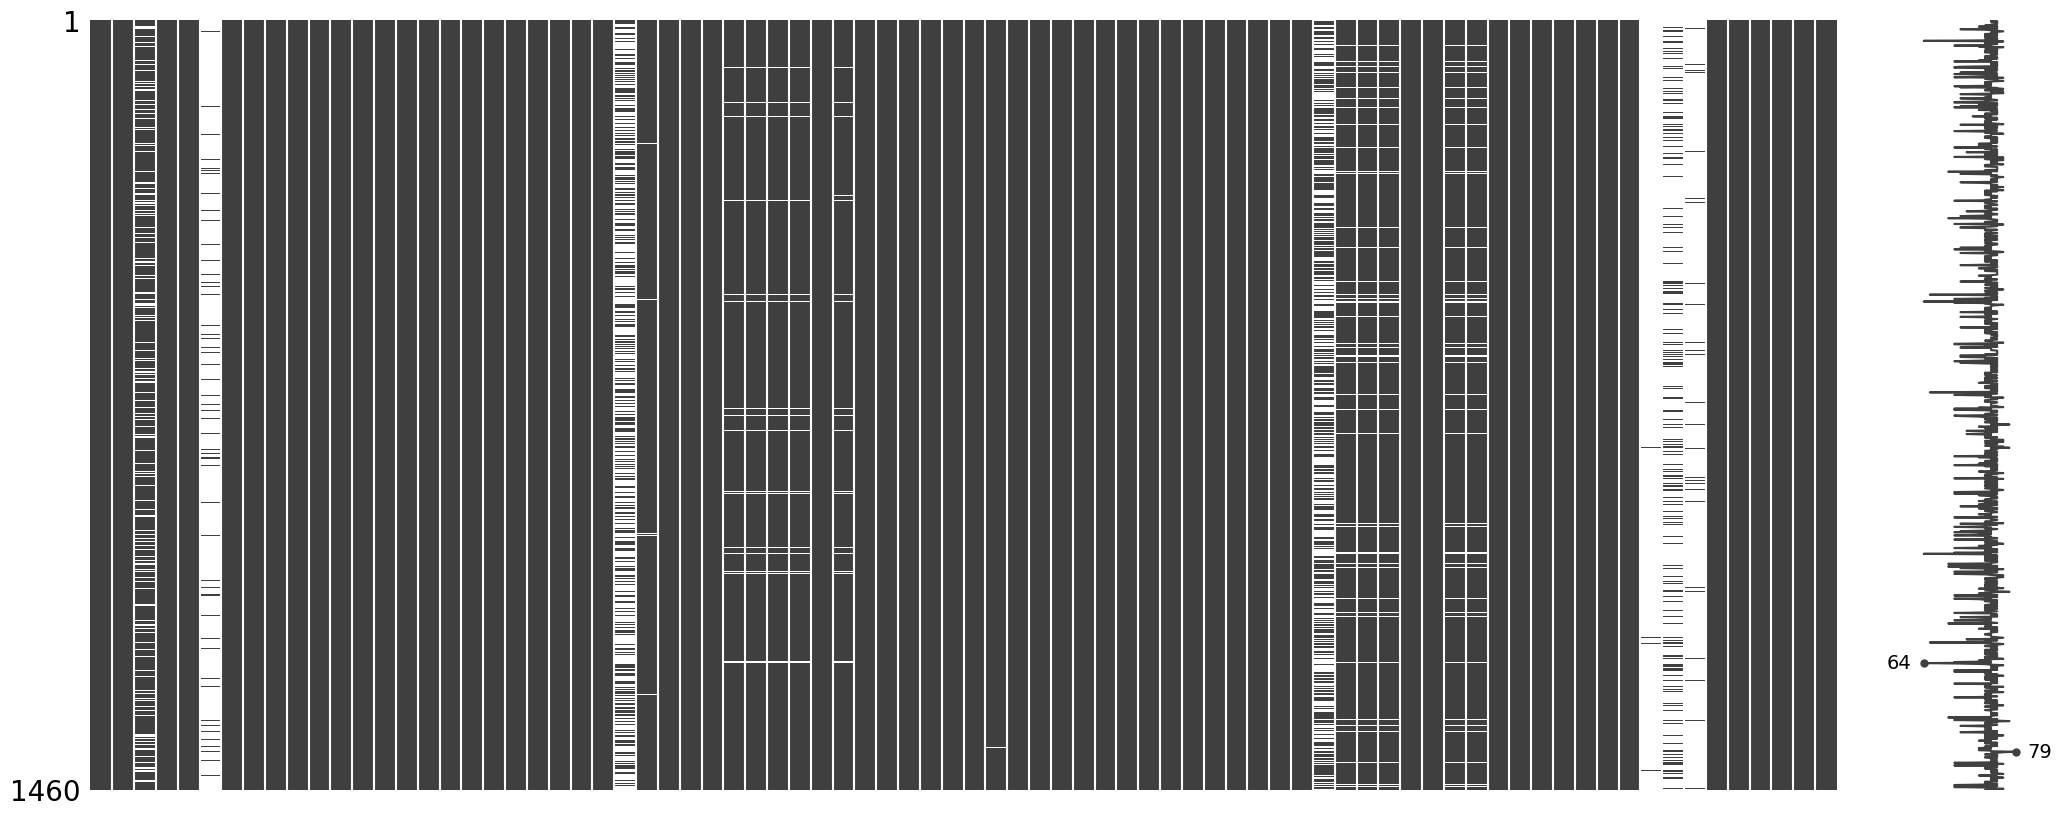

In [12]:
msno.matrix(train)

In [13]:
# Create a sub DataFrame with rows that have at least one missing value
missing_rows_df = train[train.isnull().any(axis=1)]

# Check the number of rows with missing values
print(f"Number of rows with at least one missing value: {missing_rows_df.shape[0]}")

Number of rows with at least one missing value: 1460


<Axes: >

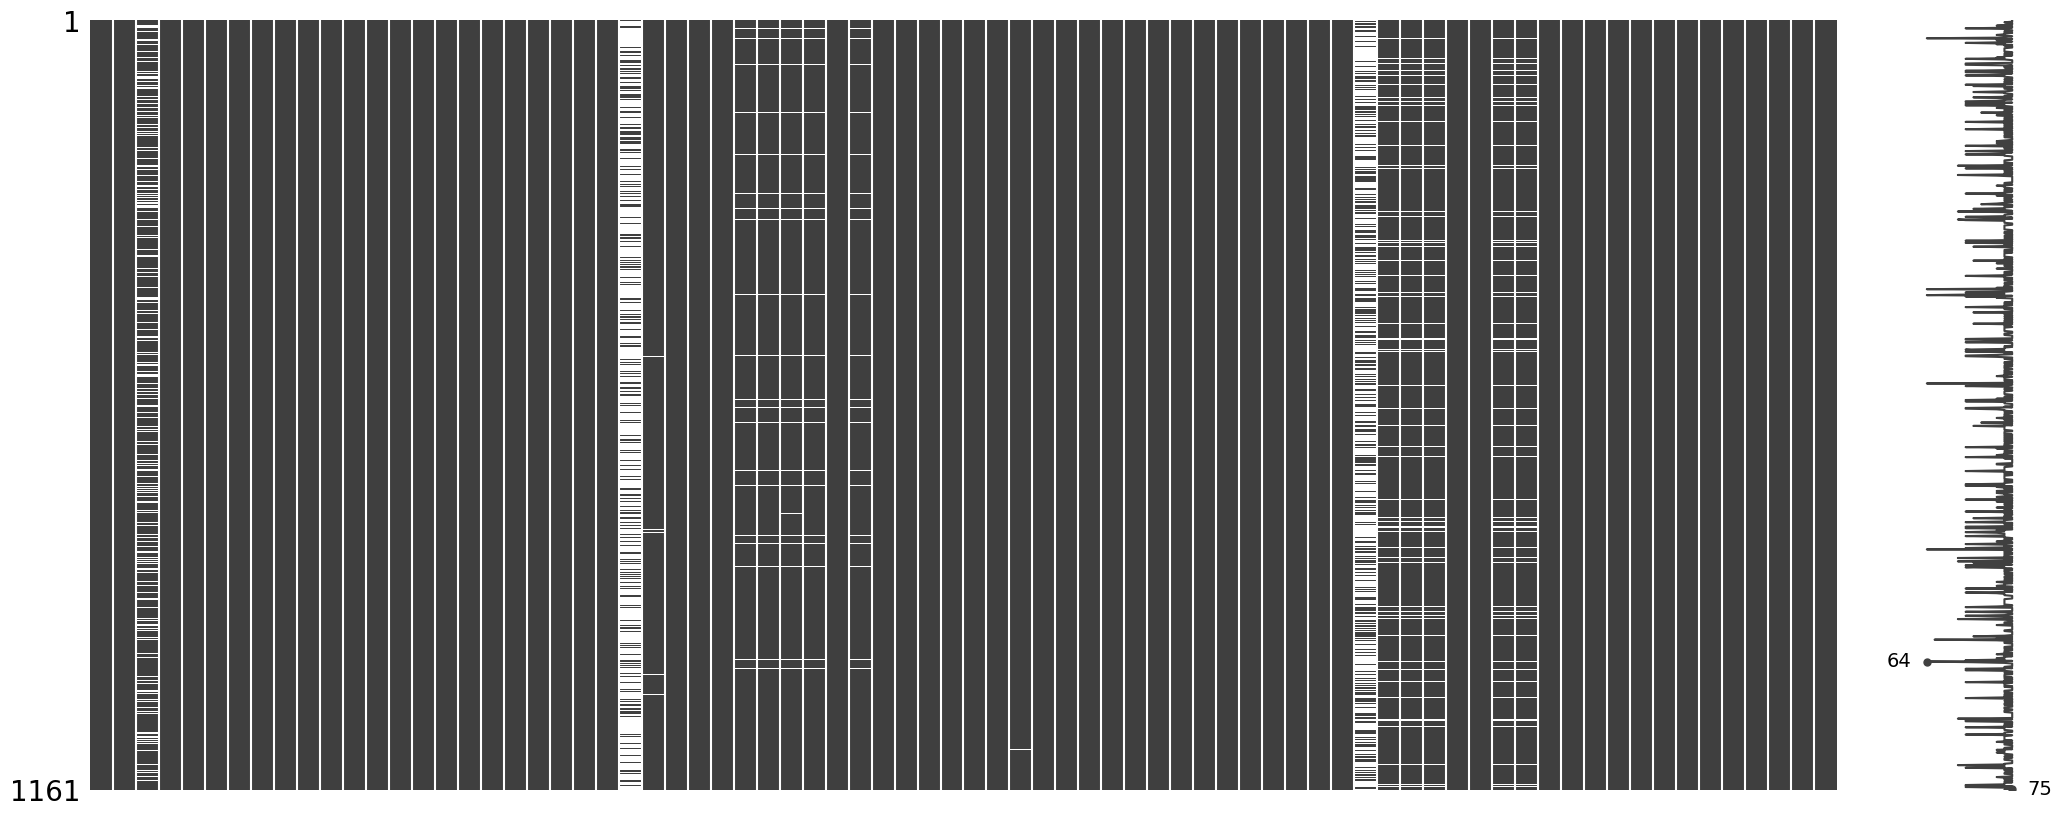

In [45]:
msno.matrix(missing_rows_df)

**Drop Columns with High Missing Values**

In [14]:
# Drop the specified features
features_to_drop = ['PoolQC', 'MiscFeature', 'Alley', 'Fence']
train = train.drop(columns=features_to_drop)

# If you also want to drop from the test set
test = test.drop(columns=features_to_drop)

In [15]:
train.shape

(1460, 76)

In [19]:
# Count the number of missing values per row
missing_counts = train.isnull().sum(axis=1)

# Count the frequency of rows with a specific number of missing values
missing_value_distribution = missing_counts.value_counts().sort_index()

# Convert to a DataFrame for easier reading
missing_value_distribution_df = missing_value_distribution.reset_index()
missing_value_distribution_df.columns = ['Number of Missing Values', 'Row Count']

# Create a bar plot using Plotly
fig = px.bar(
    missing_value_distribution_df,
    x='Number of Missing Values',
    y='Row Count',
    title='Distribution of Missing Values per Row',
    labels={'Number of Missing Values': 'Number of Missing Values', 'Row Count': 'Number of Rows'},
    template='plotly_white'
)

fig.update_layout(xaxis_title='Number of Missing Values', yaxis_title='Number of Rows')
fig.show()

**Handling Missing Values in `LotFrotage`**

In [25]:
# Calculate the proportion of missing values for LotFrontage
missing_proportion = train['LotFrontage'].isnull().sum() / len(train) * 100
print(f"Proportion of missing values for LotFrontage: {missing_proportion:.2f}%")

Proportion of missing values for LotFrontage: 17.74%


In [26]:
train['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [34]:

# Calculate KDE for LotFrontage (ignoring missing values)
lotfrontage_data = train['LotFrontage'].dropna()
kde = gaussian_kde(lotfrontage_data)
x_vals = np.linspace(lotfrontage_data.min(), lotfrontage_data.max(), 1000)
kde_vals = kde(x_vals)

# Create the histogram with proportion normalization
fig = px.histogram(train, 
                   x='LotFrontage', 
                   nbins=100, 
                   title='LotFrontage Distribution with Density',
                   labels={'LotFrontage': 'Lot Frontage'},
                   template='plotly_white',
                   histnorm='probability density')  # Normalize to proportion

fig.update_traces(marker_color='blue', opacity=0.75)

# Add the density curve
fig.add_trace(
    go.Scatter(
        x=x_vals,
        y=kde_vals,
        mode='lines',
        line=dict(color='black', width=2),
        name='Density Estimation'
    )
)

fig.update_layout(
    yaxis_title='Density',
    xaxis_title='Lot Frontage',
    showlegend=True
)

fig.show()

**Is `LotFrontage` correlated with other features ?**

Understanding whether `LotFrontage` is correlated with other features helps us decide how to handle its missing values. If `LotFrontage` has strong relationships with other variables, we can use those features for informed imputation methods, such as regression-based or group-wise imputation. This ensures that the missing values are filled in a way that maintains the underlying data structure and relationships, leading to more accurate and reliable predictions in our machine learning models.

In [40]:
numerical_features = train.select_dtypes(include=[np.number])

# Compute correlation matrix
correlation_matrix = numerical_features.corr()

# Extract correlations involving LotFrontage
lotfrontage_correlation = correlation_matrix['LotFrontage'].sort_values(ascending=False)

# Create a DataFrame for Plotly
correlation_df = lotfrontage_correlation.drop('LotFrontage').reset_index()
correlation_df.columns = ['Feature', 'Correlation']

# Plot using Plotly
fig = px.bar(
    correlation_df.sort_values(by='Correlation', ascending=True),
    x='Correlation',
    y='Feature',
    orientation='h',
    title='Correlation of LotFrontage with Other Features',
    labels={'Correlation': 'Correlation Coefficient', 'Feature': 'Features'},
    template='plotly_white'
)

fig.update_layout(xaxis_title="Correlation Coefficient", yaxis_title="Features")
fig.show()